In [1]:
from qsextra import ExcitonicSystem, ChromophoreSystem
from qsextra.qcomo import qevolve, clevolve
from qsextra.tools import spectral_function
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
from scipy.io import loadmat

In this notebook, we will show a technique to handle environments that are highly non-Markovian.

The problem is set in the framework of a system-pseudomode implementation, where the dynamics is governed by a Lindblad-form quantum master equation with dissipator acting on the pseudomodes:

$$
\hat{H} = \hat{H}^\text{e} + \hat{H}^\text{p} + \hat{H}^\text{ep}
$$

$$
\hat{H}^\text{e} = - \sum_{i=1}^N \frac{\epsilon_i}{2} \hat{\sigma}_i^z + \sum_{i=1}^{N-1} \sum_{j>i} J_{ij} \left( \hat{\sigma}_i^+\hat{\sigma}_j^- + \hat{\sigma}_i^- \hat{\sigma}_j^+ \right)
$$

$$
\hat{H}^\text{p} = \sum_{i=1}^N \sum_{k} \omega_{k} \hat{a}_{ik}^\dagger \hat{a}_{ik}
$$

$$
\hat{H}^\text{ep} = \sum_{i=1}^N | e_i \rangle \langle e_i | \sum_{k} g_{k} \left( \hat{a}_{ik}^\dagger + \hat{a}_{ik} \right)
$$
with $g_{k} = \sqrt{\Gamma_k \Omega_k / 2}$

$$
\frac{d \rho (t)}{dt} =
-i \left[ \hat{H}, \rho (t) \right] +
2 \sum_{i=1}^N
\sum_k \Omega_k
\left(
\hat{a}_{ik} \rho (t) \hat{a}_{ik}^\dagger -
\frac{1}{2} \left[ \hat{a}_{ik}^\dagger \hat{a}_{ik}, \rho (t) \right]_+
\right)
$$

A pseudomode with a slow relaxation rate ($\Omega \ll 1$), which is also strongly-coupled with the system, can require a large Hilbert space for an effective truncation in a numerical implementation.
The binary embedding of these states in a quantum register is always more convenient than the encoding in a classical device, nevertheless, it can be useful to reduce the dimensionality of the problem.

A Lorentzian function can always be decomposed as the sum of $W'$ Lorentzians with the same width ($\Omega$) and central frequency ($\omega$), and scaled amplitude ($\Gamma' = \Gamma/W'$).
Therefore, in a pseudomode implementation, this means that a Lorentzian contribution to the spectral function can be implemented using $W'$ pseudomodes.
One can exploit this decomposition to reduce the $\Gamma'/\Omega$ ratio which modulates the dimension of the active Hilbert space for a pseudomode.

Here, we show that (in some cases) it can be convinient to use more pseudomodes with few states, intead of one pseudomode with many states (we keep constant the dimension of the total Hilbert space).
We noted that this implementation, albeit not general, usually works for the exciton-pseudomode problem.

In [2]:
N = 2
epsilon = [0.]*N
J = toeplitz([0., 1.])
dt_collisions = 0.05
t_list = np.arange(0, 20, dt_collisions)

In [3]:
esys = ExcitonicSystem(energies=epsilon, dipole_moments=[1.,1.], couplings=J)
esys.set_state(state_type='localized excitation', state=0)
sys = ChromophoreSystem(excitonic_system=esys)

In [4]:
Gamma = 20
Omega = 0.1

# Case 1: One pseudomode with $\Gamma = 20$ and $d = 16$ states

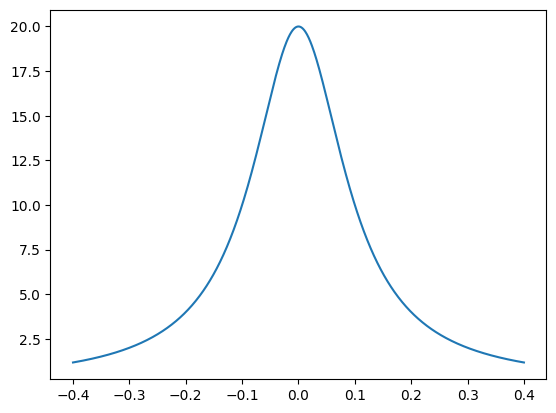

In [5]:
W_prime = 1
frequencies_pseudomode = [0]*W_prime
Gamma_list = [Gamma/W_prime]*W_prime
Omega_list = [Omega]*W_prime
fr, sf = spectral_function(frequencies_pseudomode, Gamma_list, Omega_list)
plt.plot(fr, sf)

In [6]:
sys.pseudomodes(frequencies_pseudomode = frequencies_pseudomode,
                levels_pseudomode = [16]*len(frequencies_pseudomode),
                couplings_ep = np.sqrt(np.array(Gamma_list)*np.array(Omega_list)/2).tolist(),
               )
coll_rate = (2 * np.array(Omega_list)).tolist()
results_1 = clevolve(sys, t_list, coll_rate, measure_populations = False)
P_1 = [[] for _ in range(N)]
for t in range(len(t_list)):
    for i in range(N):
        P_1[i].append(results_1.states[t].ptrace(N-i-1)[1,1])

Legend tells of a legendary warrior whose kung fu skills were the stuff of legend. [Po]


C:\Users\fede\anaconda3\envs\qsextra_test\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\fede\anaconda3\envs\qsextra_test\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


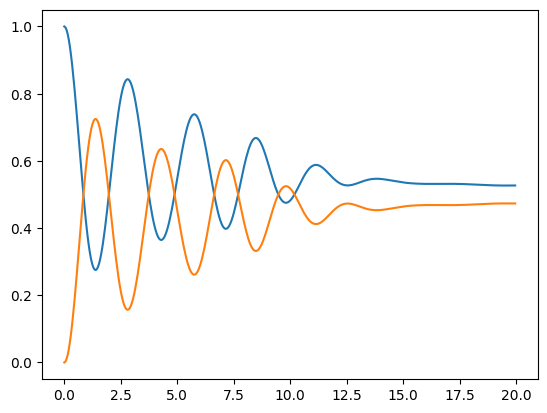

In [7]:
[plt.plot(t_list, P_1[i]) for i in range(N)];

# Case 2: $W'=2$ pseudomodes with $\Gamma' = 10$ and $d' = 4$ states/pseudomode

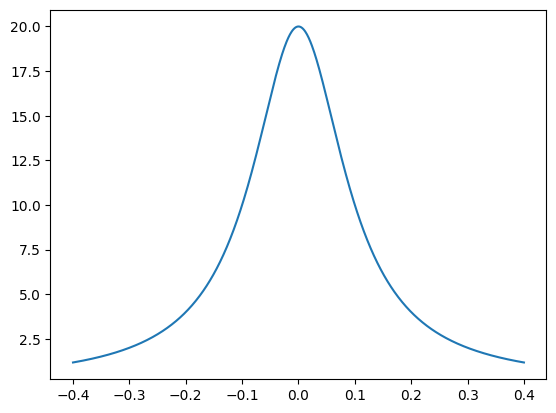

In [8]:
W_prime = 2
frequencies_pseudomode = [0]*W_prime
Gamma_list = [Gamma/W_prime]*W_prime
Omega_list = [Omega]*W_prime
fr, sf = spectral_function(frequencies_pseudomode, Gamma_list, Omega_list)
plt.plot(fr, sf)

In [9]:
sys.pseudomodes(frequencies_pseudomode = frequencies_pseudomode,
                levels_pseudomode = [4]*len(frequencies_pseudomode),
                couplings_ep = np.sqrt(np.array(Gamma_list)*np.array(Omega_list)/2).tolist(),
               )
coll_rate = (2 * np.array(Omega_list)).tolist()
results_2 = clevolve(sys, t_list, coll_rate, measure_populations = False)
P_2 = [[] for _ in range(N)]
for t in range(len(t_list)):
    for i in range(N):
        P_2[i].append(results_2.states[t].ptrace(N-i-1)[1,1])

You must let go of the illusion of control. [Master Oogway]


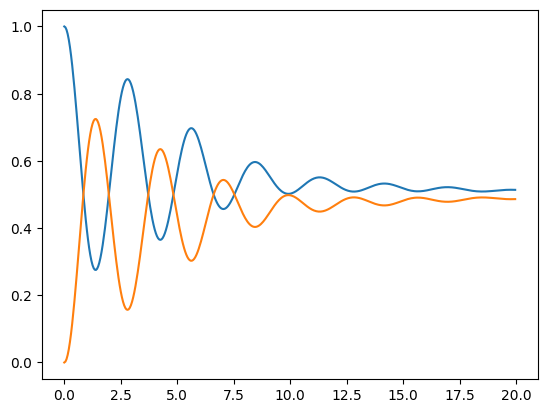

In [10]:
[plt.plot(t_list, P_2[i]) for i in range(N)];

# Case 3: $W'=4$ pseudomodes with $\Gamma' = 5$ and $d' = 2$ states/pseudomode

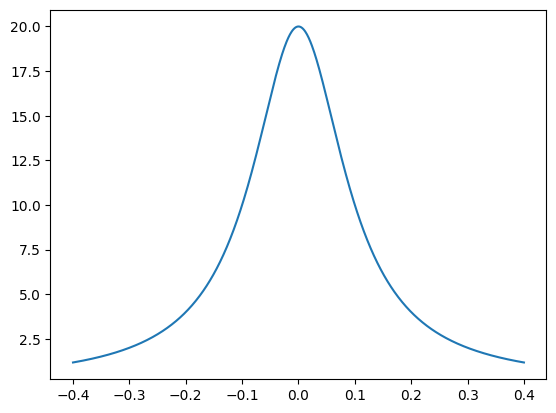

In [11]:
W_prime = 4
frequencies_pseudomode = [0]*W_prime
Gamma_list = [Gamma/W_prime]*W_prime
Omega_list = [Omega]*W_prime
fr, sf = spectral_function(frequencies_pseudomode, Gamma_list, Omega_list)
plt.plot(fr, sf)

In [12]:
sys.pseudomodes(frequencies_pseudomode = frequencies_pseudomode,
                levels_pseudomode = [2]*len(frequencies_pseudomode),
                couplings_ep = np.sqrt(np.array(Gamma_list)*np.array(Omega_list)/2).tolist(),
               )
coll_rate = (2 * np.array(Omega_list)).tolist()
results_4 = clevolve(sys, t_list, coll_rate, measure_populations = False)
P_4 = [[] for _ in range(N)]
for t in range(len(t_list)):
    for i in range(N):
        P_4[i].append(results_4.states[t].ptrace(N-i-1)[1,1])

There is no secret ingredient. It's just you. [Po]


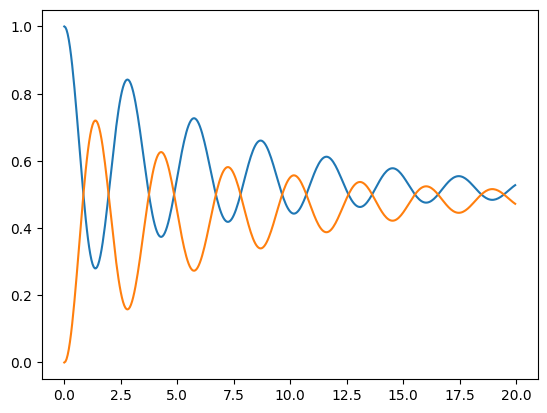

In [13]:
[plt.plot(t_list, P_4[i]) for i in range(N)];

# Comparison of the results

Load the benchmark (fast comparison)

In [14]:
heom = loadmat('Benchmark Example 3/data.mat')

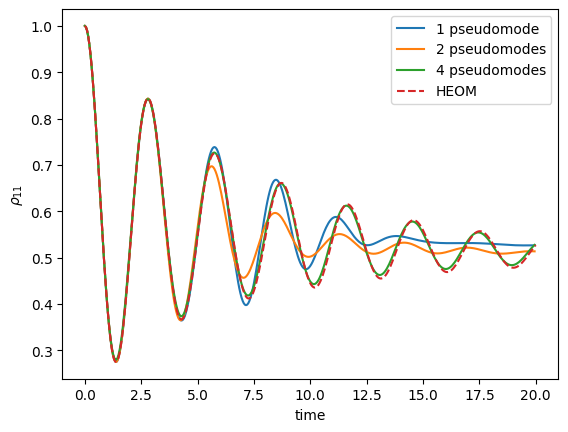

In [15]:
plt.plot(t_list, P_1[0], label='1 pseudomode') #16 -> 4 qubits
plt.plot(t_list, P_2[0], label='2 pseudomodes') #4, 4 -> 4 qubits
plt.plot(t_list, P_4[0], label='4 pseudomodes') #2, 2, 2, 2 -> 4 qubits
plt.plot(heom['x'][0], heom['y'][0], '--', label='HEOM')
plt.legend()
plt.xlabel('time')
plt.ylabel(r'$\rho_{11}$');
# plt.savefig('More is Better.png', dpi=600)

Compute HEOM and compare fidelities and trace distances

In [16]:
from qutip import basis, tensor, qeye, ket2dm, fidelity, tracedist
from qutip.solver.heom import HEOMSolver, BosonicBath

# Building the bath
ckAR = [Gamma*Omega]
ckAI = [Omega]
vkAR = [0]
vkAI = [0]
baths = []
for i in range(N):
    Q = tensor(*[qeye(2)]*(i), ket2dm(basis(2,1)), *[qeye(2)]*(N-i-1))
    bath = BosonicBath(Q, ckAR, ckAI, vkAR, vkAI)
    baths.append(bath)

# HEOM
max_depth = 11  # maximum hierarchy depth to retain
options = {"nsteps": 15000, "store_states": True, "rtol":1e-14, "atol":1e-14}

solver = HEOMSolver(sys.get_e_Hamiltonian(), bath, max_depth=max_depth, options=options)
result = solver.run(ket2dm(sys.get_e_state()), t_list)

10.0%. Run time:   0.02s. Est. time left: 00:00:00:00
20.1%. Run time:   0.04s. Est. time left: 00:00:00:00
30.1%. Run time:   0.05s. Est. time left: 00:00:00:00
40.1%. Run time:   0.06s. Est. time left: 00:00:00:00
50.1%. Run time:   0.08s. Est. time left: 00:00:00:00
60.2%. Run time:   0.09s. Est. time left: 00:00:00:00
70.2%. Run time:   0.10s. Est. time left: 00:00:00:00
80.2%. Run time:   0.11s. Est. time left: 00:00:00:00
90.2%. Run time:   0.12s. Est. time left: 00:00:00:00
100.0%. Run time:   0.13s. Est. time left: 00:00:00:00
Total run time:   0.13s


In [17]:
P_HEOM = []
F = [[],[],[]]
T = [[],[],[]]
for t in range(len(t_list)):
    P_HEOM.append(result.states[t][1,1])
    F[0].append(fidelity(results_1.states[t].ptrace(range(N)), result.states[t]))
    F[1].append(fidelity(results_2.states[t].ptrace(range(N)), result.states[t]))
    F[2].append(fidelity(results_4.states[t].ptrace(range(N)), result.states[t]))
    T[0].append(tracedist(results_1.states[t].ptrace(range(N)), result.states[t]))
    T[1].append(tracedist(results_2.states[t].ptrace(range(N)), result.states[t]))
    T[2].append(tracedist(results_4.states[t].ptrace(range(N)), result.states[t]))

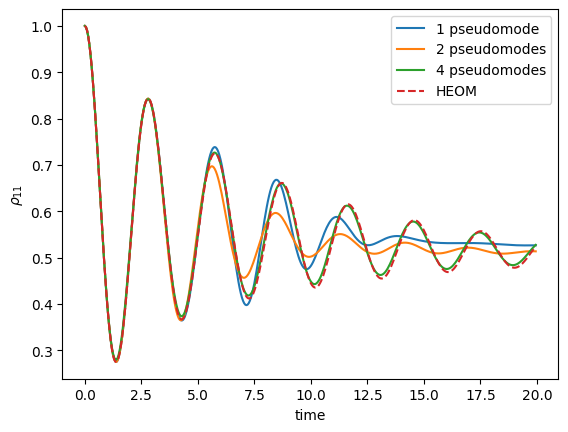

In [18]:
plt.plot(t_list, P_1[0], label='1 pseudomode') #16 -> 4 qubits
plt.plot(t_list, P_2[0], label='2 pseudomodes') #4, 4 -> 4 qubits
plt.plot(t_list, P_4[0], label='4 pseudomodes') #2, 2, 2, 2 -> 4 qubits
plt.plot(t_list,P_HEOM, '--', label='HEOM')
plt.legend()
plt.xlabel('time')
plt.ylabel(r'$\rho_{11}$');

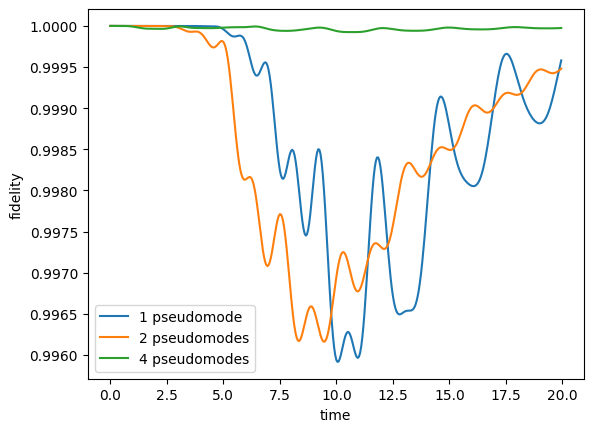

In [19]:
plt.plot(t_list, F[0], label='1 pseudomode')
plt.plot(t_list, F[1], label='2 pseudomodes')
plt.plot(t_list, F[2], label='4 pseudomodes')
plt.legend()
plt.xlabel('time')
plt.ylabel('fidelity');

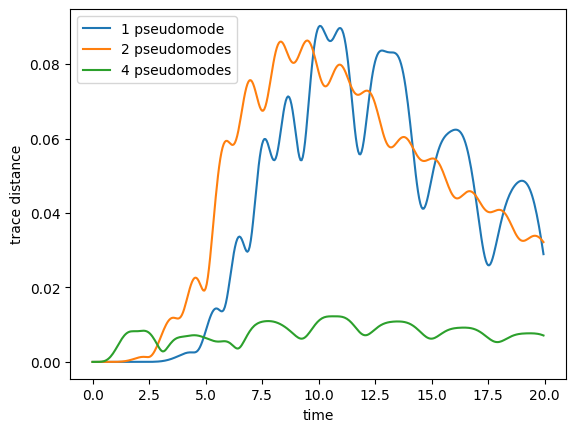

In [20]:
plt.plot(t_list, T[0], label='1 pseudomode')
plt.plot(t_list, T[1], label='2 pseudomodes')
plt.plot(t_list, T[2], label='4 pseudomodes')
plt.legend()
plt.xlabel('time')
plt.ylabel('trace distance');